# Write a program to solve the Linear Regression problem  :
Find
RMSE
MAE
R² (Coefficient of Determination)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
dataset = pd.read_csv("diabetes.csv")

In [5]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
dataset.shape

(768, 9)

In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.isna().any

<bound method NDFrame._add_numeric_operations.<locals>.any of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age 

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 null values are present in the form of zeros.
 Glucose, BloodPressure, SkinThickness, Insulin, BMI to be zero. So, we have to handle this.

In [10]:
zeros =["Glucose", "BloodPressure", "SkinThickness",
                    "Insulin", "BMI"]
for col in zeros: 
    dataset[col].replace(0,np.nan,inplace=True)

In [11]:
for col in zeros:
    dataset[col].replace(np.nan, dataset[col].mean(), inplace=True) #For each column, it replaces any NaN values with the mean of that column

In [12]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
#extracting input and output features
X = dataset.iloc[:, :-1].to_numpy() #Extracts the input features (all columns except the last one) from the DataFrame dataset and converts them into a NumPy array X.
y = dataset.iloc[:, -1].to_numpy()  #Extracts the output feature (the last column) from the DataFrame dataset and converts it into a NumPy array y

In [15]:
#split the dataset in Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                  )

In [16]:
print(X_train.shape)


(614, 8)


In [17]:
print(y_train.shape)


(614,)


In [20]:
print(X_test.shape)



(154, 8)


In [19]:
print(y_test.shape)


(154,)


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model= LinearRegression()

In [26]:
model.fit(X_train,y_train) #The fit method is used to train the model on the provided training data

LinearRegression()

In [27]:
y_pred=model.predict(X_test)



In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np




mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)


rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)


mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)


r2 = r2_score(y_test, y_pred)
print('R-squared (R²):', r2)


Mean Squared Error (MSE): 0.16927390515936439
Root Mean Squared Error (RMSE): 0.41142910101178354
Mean Absolute Error (MAE): 0.3380775650137473
R-squared (R²): 0.24311841350688423


In [21]:
# Import necessary libraries
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression

# Initialize KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store Mean Squared Error (MSE) and R-squared (R²) for each fold
mse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    
    # Split the data into training and test sets for each fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R² for this fold
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the lists
    mse_list.append(mse)
    r2_list.append(r2)

# Calculate the average MSE and R² across all folds
mean_mse = np.mean(mse_list)
mean_r2 = np.mean(r2_list)

# Print the average performance metrics
print('Average MSE across 5 folds:', mean_mse)
print('Average R-squared across 5 folds:', mean_r2)


Average MSE across 5 folds: 0.16067504961353457
Average R-squared across 5 folds: 0.2885644540539594


In [30]:
print(model.coef_)

[ 0.02129397  0.00669071 -0.00095521 -0.00071948 -0.00022265  0.01386667
  0.1367458   0.00209435]


In [31]:
print(model.intercept_)

-1.0097502710272999


Average MSE across 5 folds: 0.16067504961353457
Average R-squared across 5 folds: 0.2885644540539594


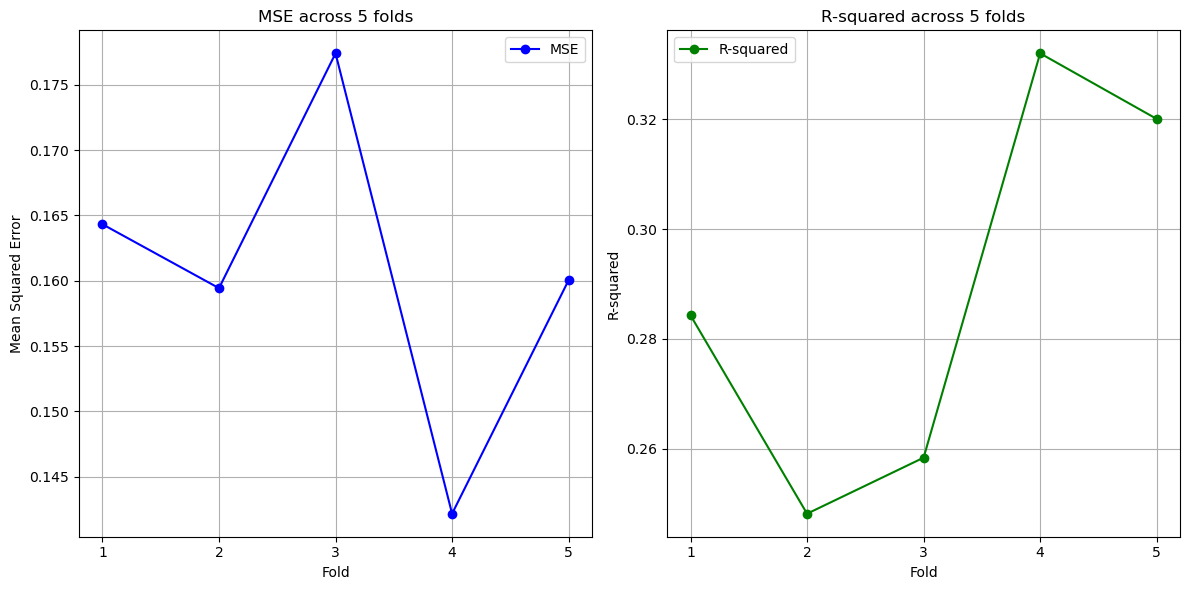

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
r2_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_list.append(mse)
    r2_list.append(r2)

mean_mse = np.mean(mse_list)
mean_r2 = np.mean(r2_list)

print('Average MSE across 5 folds:', mean_mse)
print('Average R-squared across 5 folds:', mean_r2)

# Plotting the results
folds = range(1, 6)

plt.figure(figsize=(12, 6))

# Plot for MSE
plt.subplot(1, 2, 1)
plt.plot(folds, mse_list, marker='o', color='b', label='MSE')
plt.title('MSE across 5 folds')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.xticks(folds)
plt.grid(True)
plt.legend()

# Plot for R-squared
plt.subplot(1, 2, 2)
plt.plot(folds, r2_list, marker='o', color='g', label='R-squared')
plt.title('R-squared across 5 folds')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.xticks(folds)
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'path_to_your_dataset.csv' with the actual dataset file path)
# The dataset is assumed to have the target variable in the last column
data = pd.read_csv('stock.csv')

# Split into input (X) and output (Y) variables
X = data.iloc[:, :-1].values  # All columns except the last one
Y = data.iloc[:, -1].values   # Last column (target)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate RMSE, MAE, and R²
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Linear Regression using scikit-learn:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


Linear Regression using scikit-learn:
RMSE: 2.359
MAE: 1.797
R²: 0.846


In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

# Load the dataset (replace 'path_to_your_dataset.csv' with the actual dataset file path)
data = pd.read_csv('stock.csv')

# Split into input (X) and output (Y) variables
X = data.iloc[:, :-1].values  # All columns except the last one
Y = data.iloc[:, -1].values   # Last column (target)

# Initialize the model
model = LinearRegression()

# Define the k-fold cross-validator (k=5 for 5 folds, for example)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store results for each fold
rmse_list = []
mae_list = []
r2_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on the test set
    Y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    # Store the metrics for this fold
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Calculate the average metrics across all folds
avg_rmse = np.mean(rmse_list)
avg_mae = np.mean(mae_list)
avg_r2 = np.mean(r2_list)

print("Linear Regression using 5-Fold Cross-Validation:")
print(f"Average RMSE: {avg_rmse:.3f}")
print(f"Average MAE: {avg_mae:.3f}")
print(f"Average R²: {avg_r2:.3f}")


Linear Regression using 5-Fold Cross-Validation:
Average RMSE: 2.347
Average MAE: 1.840
Average R²: 0.869
